In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
cleaned_data = pd.read_csv('./dataset/cc_cleaned_data_with_dummies.csv',index_col=[0])
cleaned_data_original = cleaned_data.copy()
cleaned_data.head()

,runtime_in_seconds,records_processed,size_in_bytes,parallel_number,copy_mode_CMPLCL,copy_mode_DELETE,copy_mode_EXPORT,copy_mode_IMPORT,copy_mode_LOCAL,copy_mode_REMOTE,...,use_table_segmenter_NOT_SET,use_table_segmenter_SET,records_processed_category_SMALL,records_processed_category_MEDIUM,records_processed_category_LARGE,records_processed_category_XL,size_category_SMALL,size_category_MEDIUM,size_category_LARGE,size_category_XL
0,1290.0,30619937.0,2.721724e+09,6,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,1192.0,48666506.0,3.902692e+09,6,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,343.0,32653243.0,2.246437e+09,7,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1800.0,60944409.0,5.673935e+09,10,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,249.0,118175632.0,8.857600e+09,6,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


### lets check the distribution of various numeric features

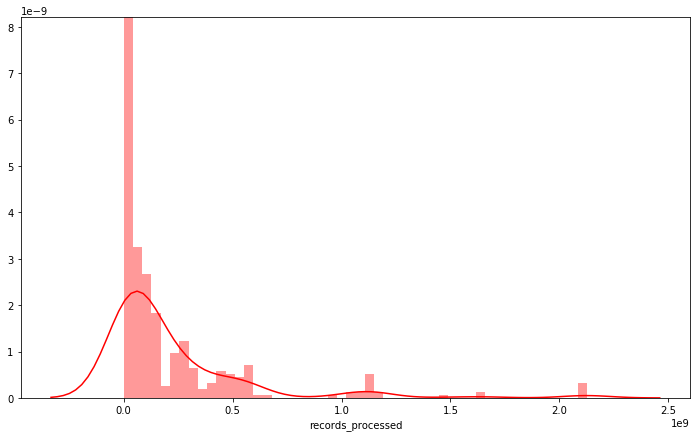

In [3]:

plt.figure(figsize=(12,7))
sns.distplot(cleaned_data['records_processed'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

#### Box-Cox Transformation for Converting into Normal-Like Distribution

In [4]:
cleaned_data = cleaned_data[cleaned_data.records_processed > 0]

In [5]:
cleaned_data.shape

(334, 42)

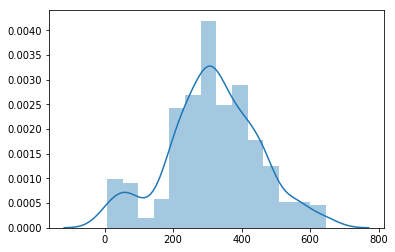

In [6]:
normalized_data,fitted = stats.boxcox(cleaned_data['records_processed'])
sns.distplot(normalized_data)

In [7]:
cleaned_data['records_processed'] = normalized_data

In [8]:
cleaned_data.head()

,runtime_in_seconds,records_processed,size_in_bytes,parallel_number,copy_mode_CMPLCL,copy_mode_DELETE,copy_mode_EXPORT,copy_mode_IMPORT,copy_mode_LOCAL,copy_mode_REMOTE,...,use_table_segmenter_NOT_SET,use_table_segmenter_SET,records_processed_category_SMALL,records_processed_category_MEDIUM,records_processed_category_LARGE,records_processed_category_XL,size_category_SMALL,size_category_MEDIUM,size_category_LARGE,size_category_XL
0,1290.0,236.875531,2.721724e+09,6,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,1192.0,264.486458,3.902692e+09,6,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,343.0,240.530321,2.246437e+09,7,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1800.0,279.011404,5.673935e+09,10,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,249.0,326.483654,8.857600e+09,6,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


Doing the same for size_in_bytes

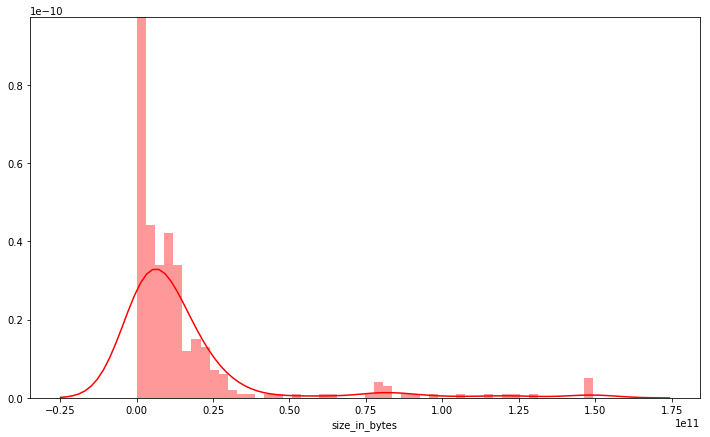

In [9]:
plt.figure(figsize=(12,7))
sns.distplot(cleaned_data['size_in_bytes'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

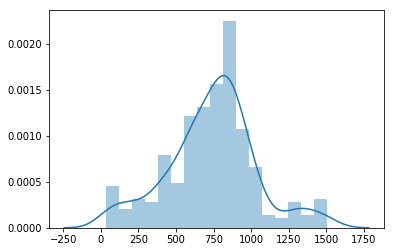

In [10]:
normalized_data,fitted = stats.boxcox(cleaned_data['size_in_bytes'])
sns.distplot(normalized_data)

In [11]:
cleaned_data['size_in_bytes'] = normalized_data

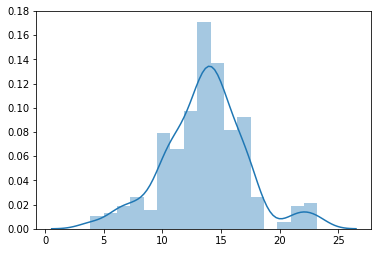

In [12]:
normalized_data,fitted = stats.boxcox(cleaned_data['runtime_in_seconds'])
sns.distplot(normalized_data)

In [13]:
cleaned_data['runtime_in_ms'] = normalized_data

In [14]:
y = cleaned_data.runtime_in_seconds
X = cleaned_data.drop(columns = ['runtime_in_seconds'])

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)
X_train_poly = poly_reg.fit_transform(X_train)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
# linear.fit(X_train,y_train)
linear.fit(X_train_poly,y_train)

y_pred=linear.predict(poly_reg.fit_transform(X_test))
# y_pred=linear.predict(X_test)

print(r2_score(y_test,y_pred))

0.8407386356123472


In [20]:
linear.score(poly_reg.fit_transform(X_test),y_test)
# linear.score(X_test,y_test)

0.8407386356123472

### R2 Score = 0.695294231970498
### That is it correctly predicts the right runtime __69.5 %__ of the times

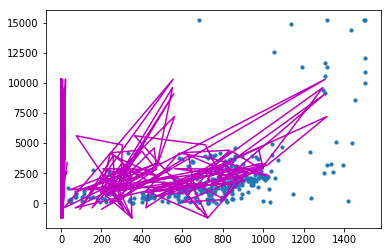

In [21]:
plt.scatter(X.size_in_bytes ,y,s=10)
plt.plot(poly_reg.fit_transform(X_test),y_pred,color= 'm')
plt.show()

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgbModel = xgb.XGBRegressor()

In [23]:
xgbModel.fit(X_train,y_train)

[01:50:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [24]:
# y_xgb_pred=xgbModel.predict(poly_reg.fit_transform(X_test))
y_xgb_pred=xgbModel.predict(X_test)

In [25]:
r2_score(y_test,y_xgb_pred)

0.9969632680293711

In [26]:
y_test.head()

65     1560.0
94     1607.0
296     333.0
132    1891.0
14     3312.0
Name: runtime_in_seconds, dtype: float64

In [27]:
y_xgb_pred

array([ 1564.384  ,  1599.8912 ,   325.71765,  1932.8584 ,  3254.1921 ,
         490.81897,  1821.0192 ,  2097.3396 ,  2368.4114 ,  9954.367  ,
        1237.9604 ,    31.20235,  4147.242  ,  3950.8809 ,  1499.1481 ,
        8559.18   ,  1024.369  ,  1319.7853 ,   749.22736,  2039.1112 ,
        1237.6985 ,  1933.9185 ,  3705.2825 ,  3582.634  ,  1025.6748 ,
          71.3716 ,  1665.0948 ,  1375.4175 ,  1165.7401 ,   908.54376,
         746.73975,  1522.7719 ,  3452.8496 ,  2216.7517 ,  2293.7048 ,
        2519.8914 ,   516.5958 , 11307.616  ,   461.34396,  3111.8752 ,
        1237.9604 ,   420.2928 ,  2291.5247 ,    31.20235,   515.83496,
         561.89923,  3724.9038 ,  3969.0725 ,  1168.7217 ,  2587.0015 ,
         747.8992 ,  1455.9846 ,   478.80933,   213.78165,  2100.456  ,
        3701.3699 ,   479.18375,  2102.3335 ,  3222.897  ,   927.16547,
         616.93616,   926.3487 ,  2368.6606 ,  3113.868  ,   419.45526,
         462.8927 ,  3703.7292 ], dtype=float32)

### Lets try to reduce the dimensionality of the data and test the performance

In [28]:
y = cleaned_data['runtime_in_seconds']
X = cleaned_data.loc[:, cleaned_data.columns != 'runtime_in_seconds']

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca_data = pca.fit_transform(X)
print('New shape :',x_pca_data.shape)

New shape : (334, 2)


In [30]:
# Attach the label
pca_data = np.vstack((x_pca_data.T,y)).T
print('pca',pca_data.shape)
pca_df = pd.DataFrame(pca_data)
print('pca_df',pca_df.shape)  

pca (334, 3)
pca_df (334, 3)


In [31]:
pca_df.columns = ['pc_1','pc_2','runtime_in_ms']
pca_df.head()

,pc_1,pc_2,runtime_in_ms
0,-156.481295,18.795135,1290.0
1,-97.928267,14.325325,1192.0
2,-178.775670,5.024702,343.0
3,-38.518191,24.488986,1800.0
4,50.487810,11.735791,249.0


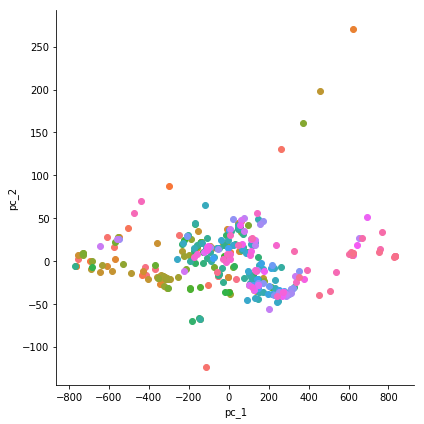

In [32]:
sns.FacetGrid(pca_df,hue='runtime_in_ms',size = 6).map(plt.scatter,'pc_1','pc_2')
plt.show()

In [33]:
X_train, X_test ,y_train ,y_test = train_test_split(x_pca_data,
                                                    y,
                                                    test_size=0.3)

In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
y_ridge_pred = ridge_model.predict(X_test)

In [35]:
r2_score(y_test,y_ridge_pred)

0.26961574953349243

### Feature Elimination

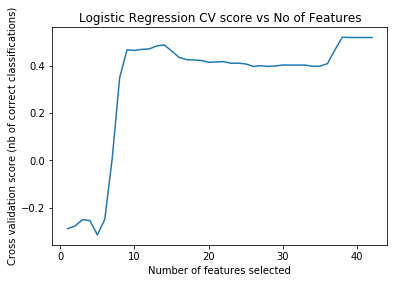

In [36]:
X_train, X_test ,y_train ,y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state = 4,
                                                   )


from sklearn.feature_selection import RFECV

rid = Ridge()
rfecv = RFECV(estimator=rid,step =1,cv=10,scoring='r2')
rfecv.fit(X_train,y_train)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### AutoML

#### H2o

In [37]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,19 mins 54 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,"1 year, 2 months and 18 days !!!"
H2O cluster name:,H2O_from_python_I323570_unql19
H2O cluster total nodes:,1
H2O cluster free memory:,3.339 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


#### Read the original Local Copy data and load to H2o

In [38]:
copies_data = pd.read_csv('./dataset/cc_new_features_outliers_removed.csv')
copies_data.head()
train = copies_data.iloc[:int(len(copies_data)*0.80)]
test = copies_data.iloc[int(len(copies_data)*0.80):]

print('Shape of training data : {}'.format(train.shape))
print('Shape of testing data : {}'.format(test.shape))

Shape of training data : (288, 14)
Shape of testing data : (73, 14)


In [39]:
hf = h2o.H2OFrame(copies_data)
hf.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:361
Cols:14




,copy_mode,profile,runtime_in_seconds,status,records_processed,size_in_bytes,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter,records_processed_category,size_category
type,enum,enum,real,enum,real,real,enum,enum,enum,int,enum,enum,enum,enum
mins,,,20.0,,0.0,0.0,,,,0.0,,,,
mean,,,2004.9983379501382,,222925714.6653738,14360843644.95069,,,,8.257617728531857,,,,
maxs,,,15196.599999999997,,2127073969.7999992,149338232406.79987,,,,30.0,,,,
sigma,,,2682.341985218122,,361131489.7011419,25881812363.89472,,,,4.63112703802773,,,,
zeros,,,0,,27,27,,,,19,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,LOCAL,SAP_UCSV,1290.0,FINISHED,30619937.0,2721723523.0,SET,NOT_SET,NOT_SET,6.0,NOT_SET,NOT_SET,MEDIUM,MEDIUM
1,LOCAL,SAP_UCSV,1192.0,FINISHED,48666506.0,3902691720.0,SET,NOT_SET,NOT_SET,6.0,NOT_SET,NOT_SET,MEDIUM,MEDIUM
2,LOCAL,SAP_UCSV,343.0,CANCELLED,32653243.0,2246436756.0,NOT_SET,NOT_SET,SET,7.0,SET,NOT_SET,MEDIUM,MEDIUM


In [40]:
splits = hf.split_frame(ratios = [0.8], seed = 1)
h2o_train = splits[0]
h20_remaining = splits[1]
splits_remaining = h20_remaining.split_frame(ratios = [0.8], seed = 1)
h2o_valid = splits_remaining[0]
h20_test = splits_remaining[1]


In [41]:
y='runtime_in_seconds'

In [42]:
aml = H2OAutoML(max_runtime_secs = 120,
                max_models=20,
                seed = 1,
                project_name = 'client_copy_runtime',
                               )
aml.train(y = y, training_frame = h2o_train, leaderboard_frame = h2o_valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [43]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DRF_1_AutoML_20200114_013206,1.49833e+06,1224.06,1.49833e+06,794.773,0.729388
DRF_1_AutoML_20200114_015153,1.49833e+06,1224.06,1.49833e+06,794.773,0.729388
GBM_1_AutoML_20200114_015153,1.79571e+06,1340.04,1.79571e+06,864.259,0.769944
GBM_1_AutoML_20200114_013206,1.79571e+06,1340.04,1.79571e+06,864.259,0.769944
DeepLearning_grid_1_AutoML_20200114_013206_model_1,1.82117e+06,1349.51,1.82117e+06,935.918,nan
DeepLearning_grid_1_AutoML_20200114_015153_model_3,1.85059e+06,1360.36,1.85059e+06,945.425,nan
DeepLearning_grid_1_AutoML_20200114_013206_model_4,1.90314e+06,1379.54,1.90314e+06,941.167,0.889801
DeepLearning_grid_1_AutoML_20200114_013206_model_3,1.95714e+06,1398.98,1.95714e+06,1004.41,0.930018
DeepLearning_grid_1_AutoML_20200114_015153_model_4,2.22887e+06,1492.94,2.22887e+06,1025.74,nan
XRT_1_AutoML_20200114_013206,2.25601e+06,1502,2.25601e+06,947.915,0.844122


In [44]:
h20_test.head()

copy_mode,profile,runtime_in_seconds,status,records_processed,size_in_bytes,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter,records_processed_category,size_category
LOCAL,SAP_ALL,475,CANCELLED,1.06572e+08,6.32705e+10,SET,NOT_SET,NOT_SET,6,NOT_SET,NOT_SET,LARGE,XL
LOCAL,SAP_ALL,2808,CANCELLED,1.01946e+08,1.0536e+10,SET,NOT_SET,SET,6,SET,NOT_SET,LARGE,LARGE
LOCAL,SAP_ALL,1523,FINISHED,4.98333e+08,1.95303e+10,NOT_SET,NOT_SET,SET,10,SET,SET,XL,XL
LOCAL,SAP_CUST,1048,FINISHED,1.29695e+08,7.56372e+09,SET,SET,SET,10,NOT_SET,NOT_SET,LARGE,LARGE
LOCAL,SAP_USER,780,FINISHED,1.28902e+07,4.82699e+08,NOT_SET,NOT_SET,SET,1,NOT_SET,NOT_SET,SMALL,SMALL
LOCAL,SAP_ALL,523,FINISHED,1.94235e+07,1.53692e+09,NOT_SET,NOT_SET,NOT_SET,10,NOT_SET,NOT_SET,MEDIUM,MEDIUM
LOCAL,SAP_ALL,1362,FINISHED,3.22178e+07,2.01391e+09,NOT_SET,NOT_SET,NOT_SET,7,NOT_SET,NOT_SET,MEDIUM,MEDIUM
REMOTE,SAP_ALL,4093,FINISHED,266029,2.96112e+08,SET,SET,NOT_SET,5,NOT_SET,NOT_SET,SMALL,SMALL
REMOTE,SAP_ALL,15196.6,FINISHED,1.13791e+09,8.20442e+10,SET,SET,SET,7,NOT_SET,SET,XL,XL


In [45]:
pred = aml.predict(h20_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [46]:
pred.head()

predict
3553.11
1664.52
1826.23
1276.61
535.971
702.667
768.111
1565.4
9509.28


In [47]:
perf = aml.leader.model_performance(h20_test)
perf


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 5567273.700651545
RMSE: 2359.5070884936
MAE: 1553.993699438778
RMSLE: 0.822215015133395
Mean Residual Deviance: 5567273.700651545


#### Save the leader model

In [ ]:
h2o.save_model(aml.leader,path = './models')

In [ ]:
aml.leader.download_mojo(path='./models')

#### AutoViml

Train (Size: 288,14) has Single_Label with target: ['runtime_in_seconds']
"
 ################### Regression  ######################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Test data has no missing values...
Trying Feature Selection among 3 numeric variables...
    No variables were removed since no highly correlated variables found in data

Detected this as a Regression problem...
    Afte

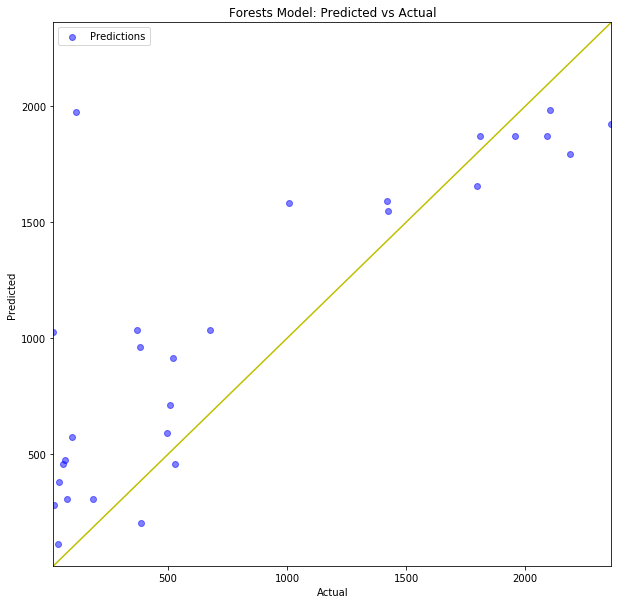

    MAE = 366.2409
    MAPE = 399%
    RMSE = 510.9738
    MAE as % std dev of Actuals = 44.4%
    Normalized RMSE (% of MinMax of Actuals) = 22%
    Normalized RMSE (% of Std Dev of Actuals) = 62%
No evaluation metrics plot available for this model
    Time taken for this Target (in seconds) = 31
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Entropy Binning 2 continuous variables...
    Binning and replacing 2 numeric features.
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 9.1 seconds
    Adding 1 Stacking feature(s) to training data
    Time taken for Stacking: 0.1 seconds
Model Training time taken in seconds = 1
    Saving predictions to .\runtime_in_seconds\runtime_in_seconds_Regression_test_modified.csv
    Saving predictions to .\runtime_in_seconds\runt

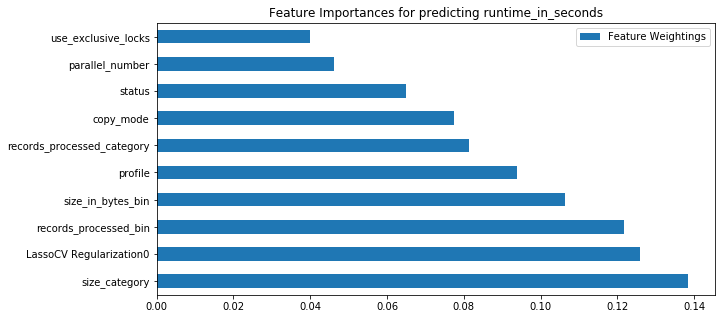

In [50]:
from autoviml.Auto_ViML import Auto_ViML

model, features, trainm, testm = Auto_ViML(
    train,
    'runtime_in_seconds',
    test,
    sample_submission='',
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="R2",
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=True,
    Add_Poly=0,
    Stacking_Flag=True,
    Imbalanced_Flag=False,
    verbose=1,
)